In [ ]:
### 1) Q : max(Ems,Fire,Traffic)
### 2) Q : timestamp max(year),max(month),max(day),max(hours)
### 3) Q : Folium Library ((pie chart:ems,fire,traffic)100 data points)
### 4) Q : 

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [103]:
data = pd.read_csv("911.csv")
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [104]:
data.shape

(423909, 9)

In [105]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [107]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [108]:
import re
def type_reason(x):
    x = str(x)
    if (re.search("EMS", x)):
        return "EMS"
    
    elif (re.search("Traffic", x)):
        return "Traffic"
    else:
        return "Fire"

In [109]:
data["call_type"] = data["title"].apply(type_reason)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Which type of call is maximum

In [110]:
datax_major_type=data["call_type"].value_counts()

In [111]:
datax_major_type = pd.Series(datax_major_type)
datax_major_type

EMS        208682
Traffic    151458
Fire        63769
Name: call_type, dtype: int64

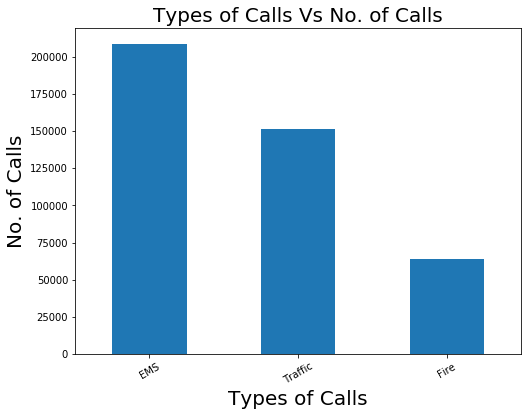

In [112]:
font ={
    "size" :20
}
plt.figure(figsize=(8,6))
datax_major_type.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Types of Calls",fontdict=font)
plt.ylabel("No. of Calls",fontdict=font)
plt.title("Types of Calls Vs No. of Calls",fontdict=font)
plt.savefig("Types-of-Calls-vs-No-of-Calls.png")

In [113]:
data['Year'] = data['timeStamp'].dt.year
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015


In [114]:
data['Month'] = data['timeStamp'].dt.month_name()
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December


In [115]:
data["Day"] = data['timeStamp'].dt.day_name()
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday


In [116]:
def actual_type_call(x):
    x= x.split(':')
    return x[1]

In [117]:
data["emergency_reason"] = data["title"].apply(actual_type_call)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,emergency_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,DIZZINESS


### Ems First 7 seven pie data plot

In [118]:
ems_data = data.copy(deep=True)

In [121]:
ems_data.query('call_type == "EMS"',inplace = True)
ems_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,emergency_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,DIABETIC EMERGENCY
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,HEAD INJURY


In [153]:
count_ems = ems_data['emergency_reason'].value_counts()

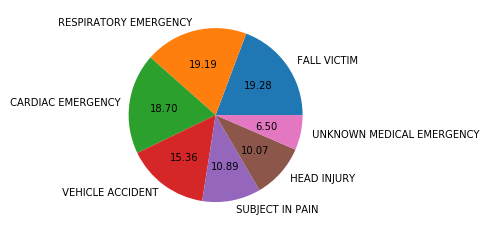

In [160]:
plt.figsize=(15,10)
plt.pie(count_ems.values[:7],labels=count_ems.index[:7],autopct="%.2f")
plt.savefig("Types-of-EMS-Calls-vs-No-of-Calls.png")

In [148]:
### Fire Data first 7 pie plot

In [155]:
fire_data = data.copy(deep = True)

In [156]:
fire_data.query('call_type == "Fire"',inplace = True)
fire_data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,emergency_reason
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,GAS-ODOR/LEAK
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,2015,December,Thursday,APPLIANCE FIRE


In [157]:
fire_data['emergency_reason'].nunique()

53

In [163]:
count_fire = fire_data['emergency_reason'].value_counts()
count_fire.head(2)

 FIRE ALARM          24380
 VEHICLE ACCIDENT     7153
Name: emergency_reason, dtype: int64

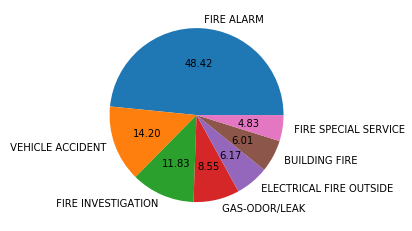

In [161]:
plt.figsize=(15,10)
plt.pie(count_fire.values[:7],labels=count_fire.index[:7],autopct="%.2f")
plt.savefig("Types-of-fire-Calls-vs-No-of-Calls.png")

In [169]:
### Traffic Pie Chart

In [170]:
traffic_data = data.copy(deep=True)

In [171]:
traffic_data.query('call_type == "Traffic"',inplace =True)
traffic_data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,emergency_reason
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,December,Thursday,VEHICLE ACCIDENT -
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,2015,December,Thursday,VEHICLE ACCIDENT -


In [172]:
traffic_data['emergency_reason'].nunique()

7

In [173]:
count_traffic = traffic_data['emergency_reason'].value_counts()
count_traffic.head(7)

 VEHICLE ACCIDENT -             98401
 DISABLED VEHICLE -             31871
 ROAD OBSTRUCTION -             14134
 HAZARDOUS ROAD CONDITIONS -     4395
 VEHICLE FIRE -                  2286
 VEHICLE LEAKING FUEL -           232
 DEBRIS/FLUIDS ON HIGHWAY -       139
Name: emergency_reason, dtype: int64

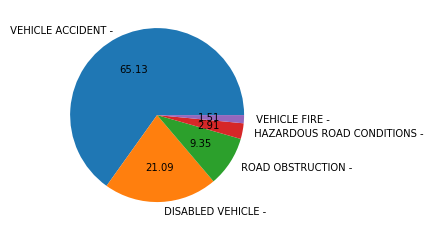

In [174]:
plt.figsize=(15,10)
plt.pie(count_traffic.values[:5],labels=count_traffic[:5].index,autopct="%.2f")
plt.savefig("Types-of-traffic-Calls-vs-No-of-Calls.png")

### Plotting using Time stamp